In [3]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.models import load_model


In [7]:
model = load_model('cats_and_dogs_1.h5')
model.summary()

W0905 17:58:44.932335  5000 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
img_path = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\dogs-vs-cats\\train\\train\\cat.1700.jpg'


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [13]:
img = image.load_img(img_path, target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)


(1, 150, 150, 3)


W0905 18:09:07.740475  5000 legend.py:1289] No handles with labels found to put in legend.


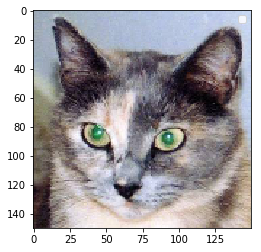

In [15]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.legend()
plt.show()

In [16]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)


In [18]:
activations = activation_model.predict(img_tensor)

In [20]:
first_layer_activations = activations[0]
print(first_layer_activations.shape)

(1, 148, 148, 32)


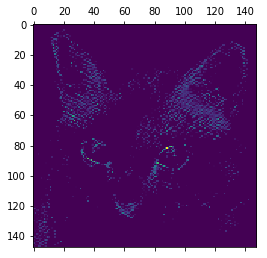

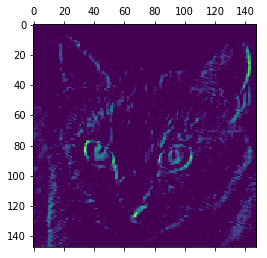

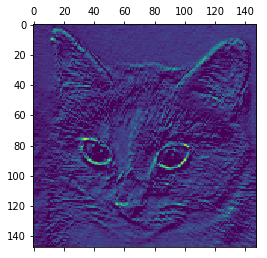

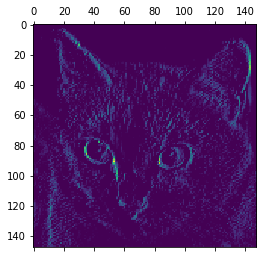

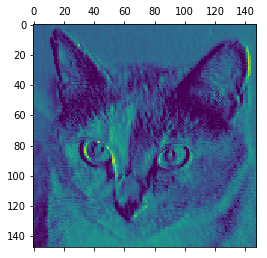

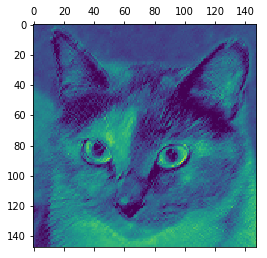

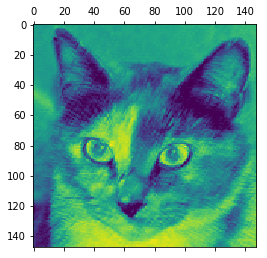

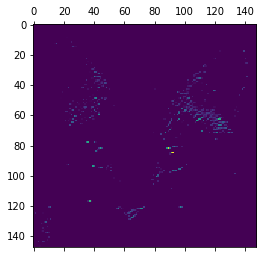

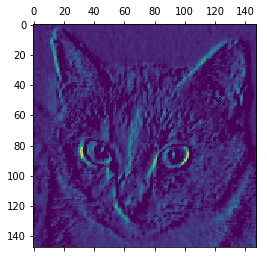

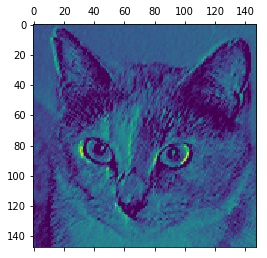

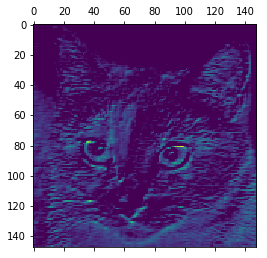

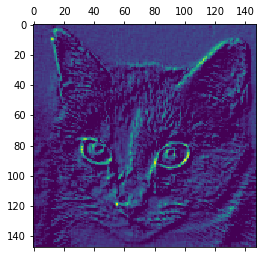

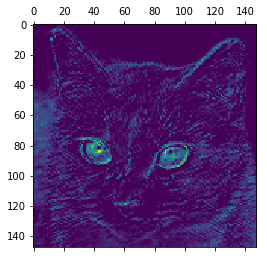

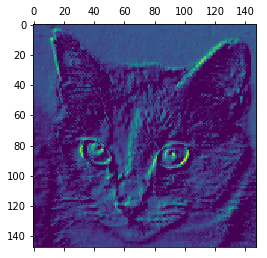

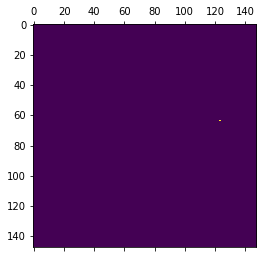

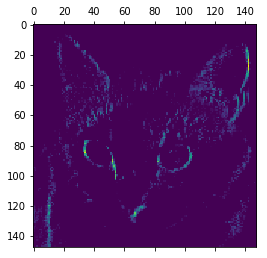

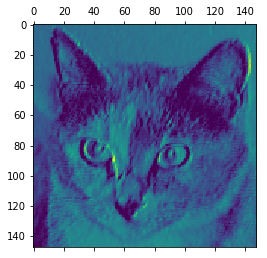

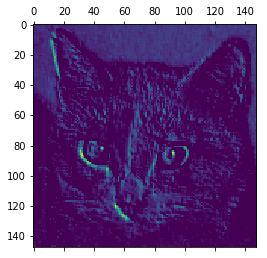

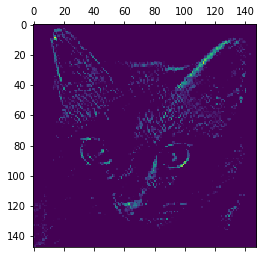

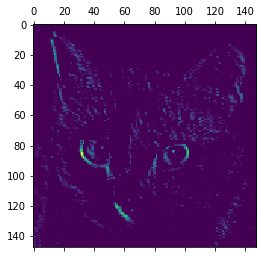

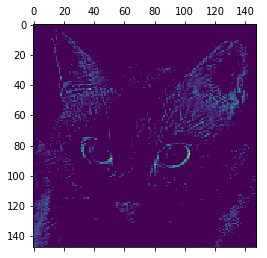

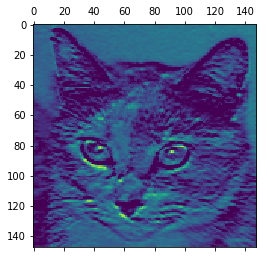

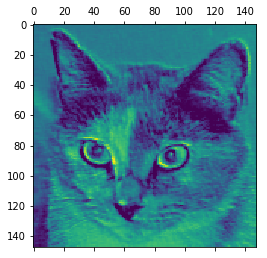

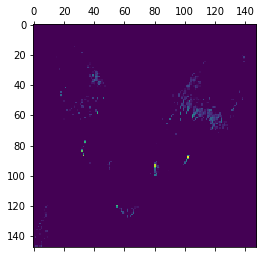

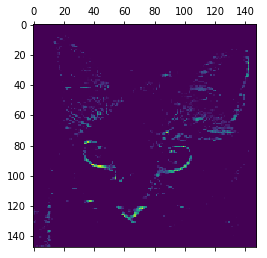

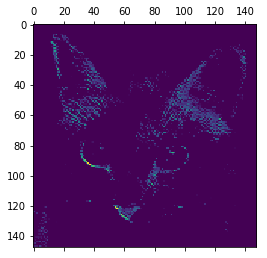

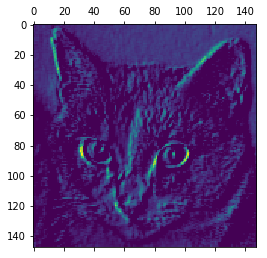

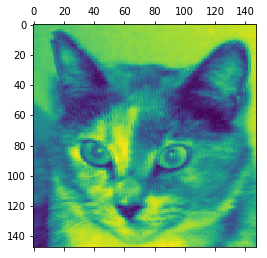

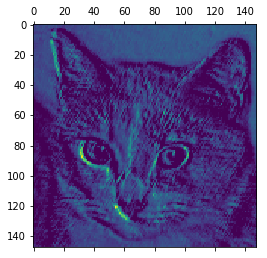

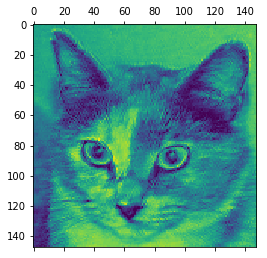

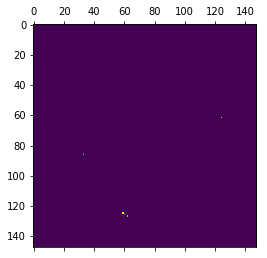

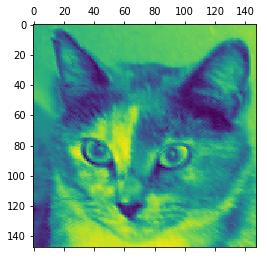

In [34]:
#4th layer of activation layer 1
for i in range(32):
    plt.figsize = (20,15)
    plt.matshow(first_layer_activations[0,:,:,i],cmap='viridis')

In [24]:
second_layer_activations = activations[1]

In [25]:
second_layer_activations.shape

(1, 74, 74, 32)

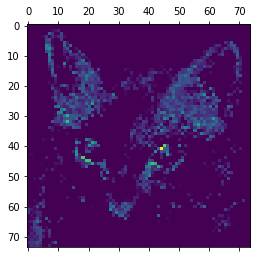

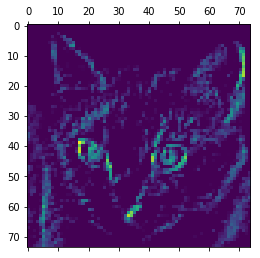

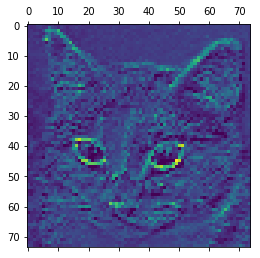

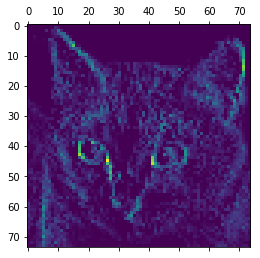

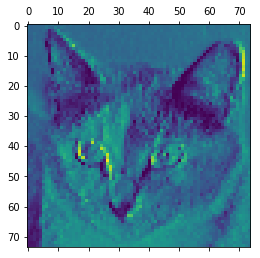

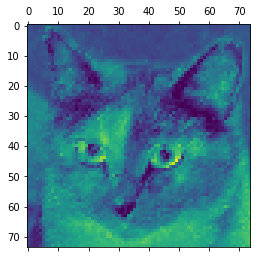

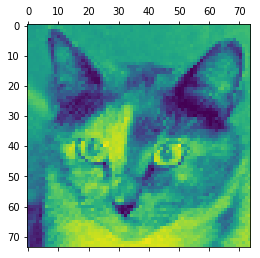

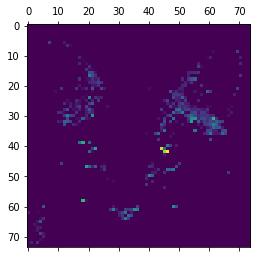

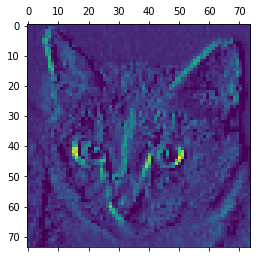

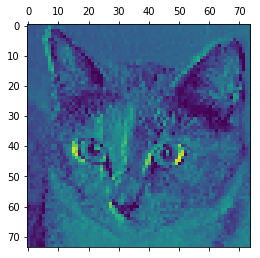

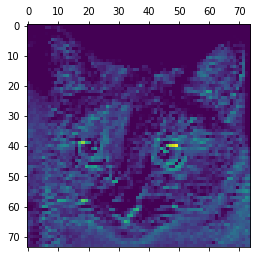

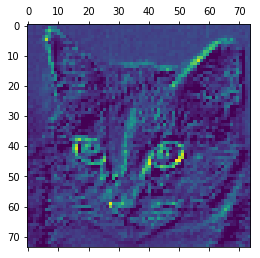

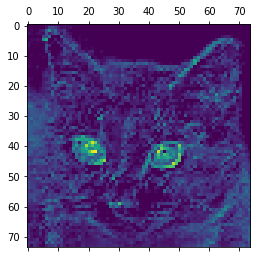

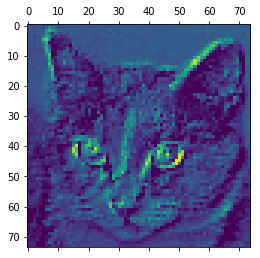

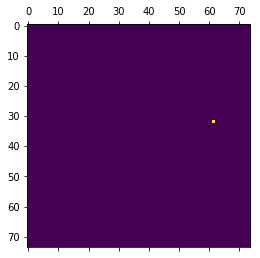

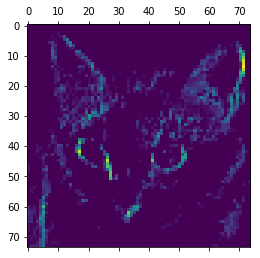

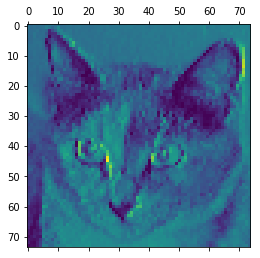

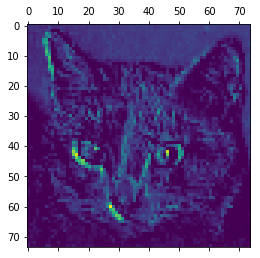

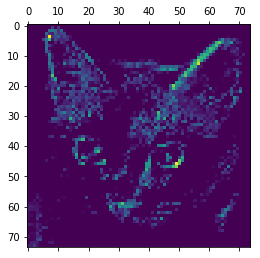

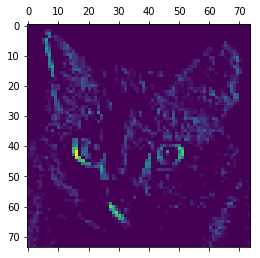

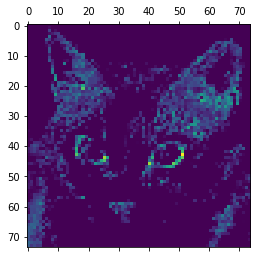

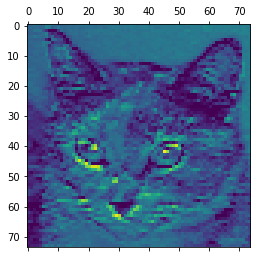

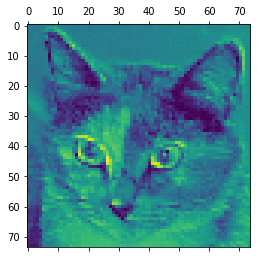

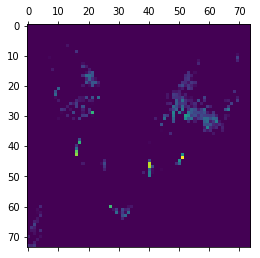

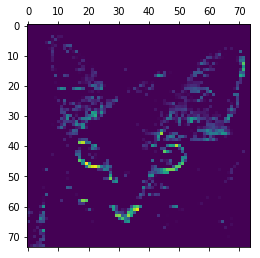

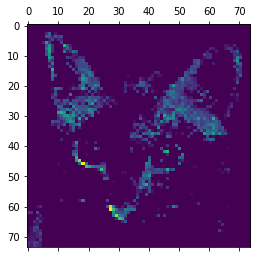

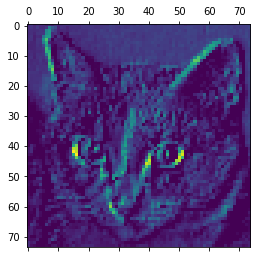

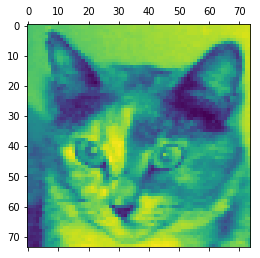

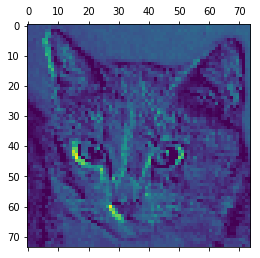

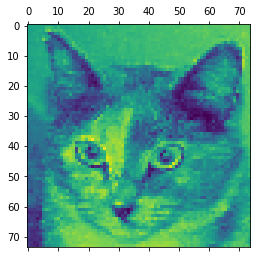

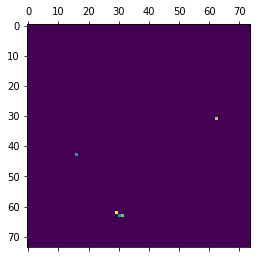

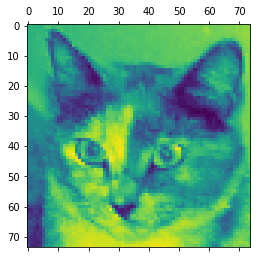

In [33]:
for i in range(32):
    
    plt.matshow(second_layer_activations[0,:,:,i], cmap = 'viridis')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


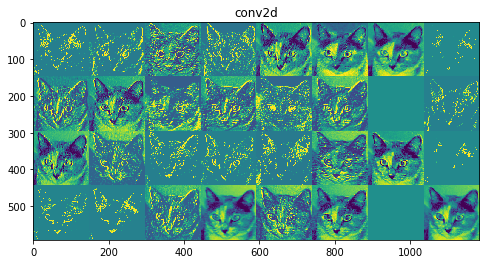

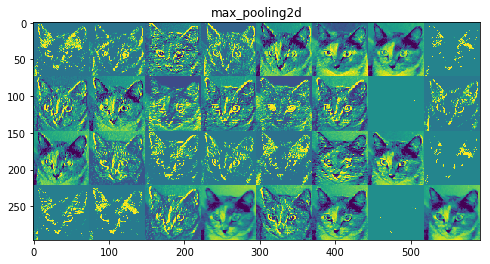

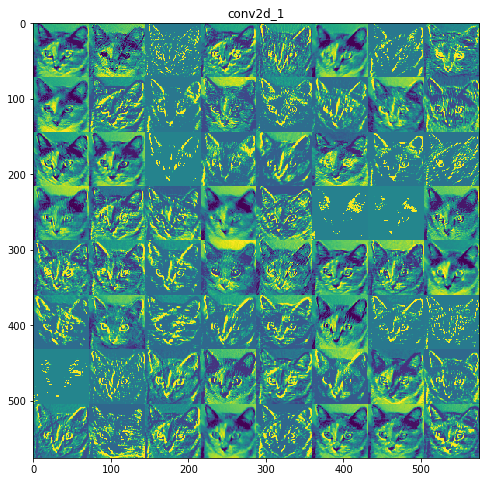

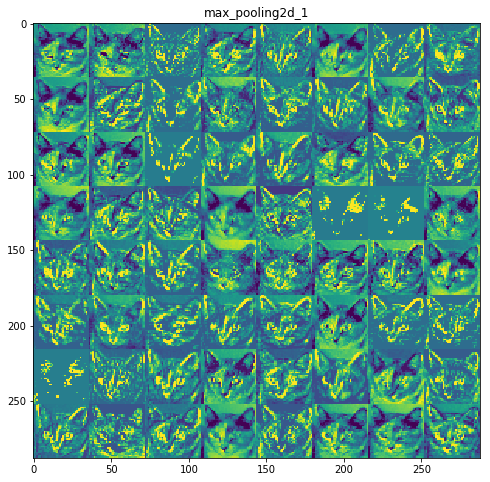

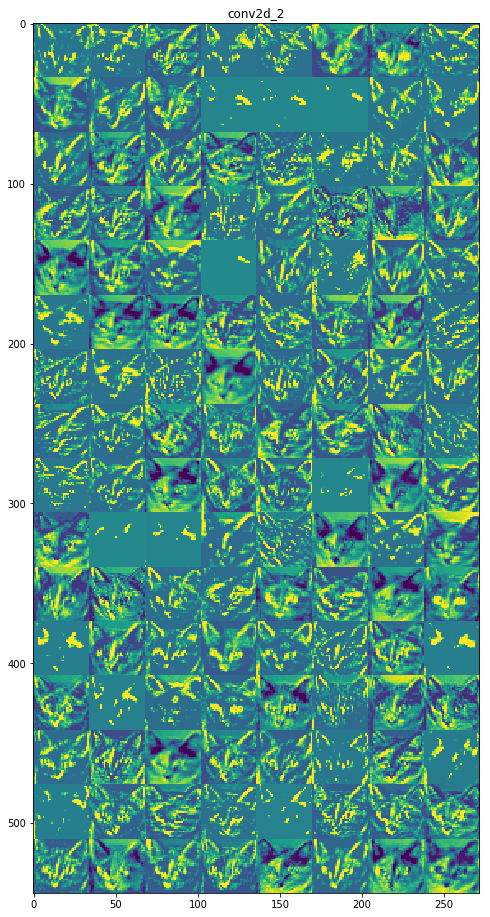

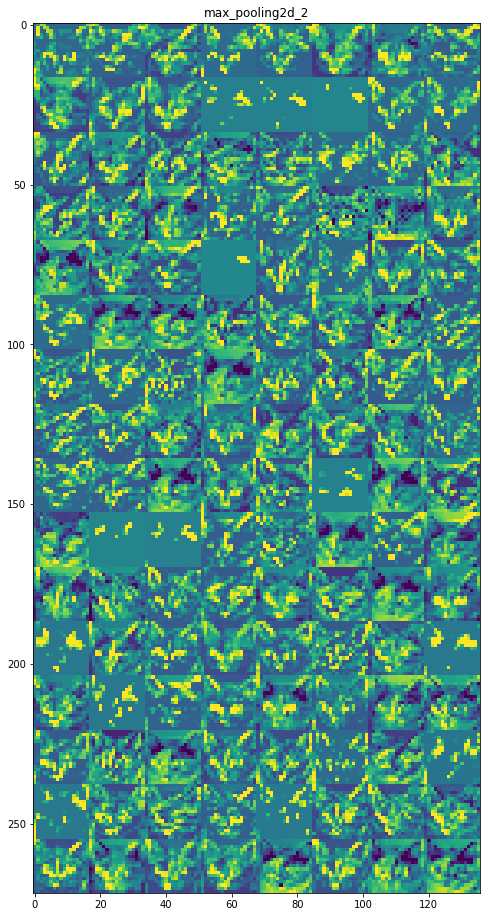

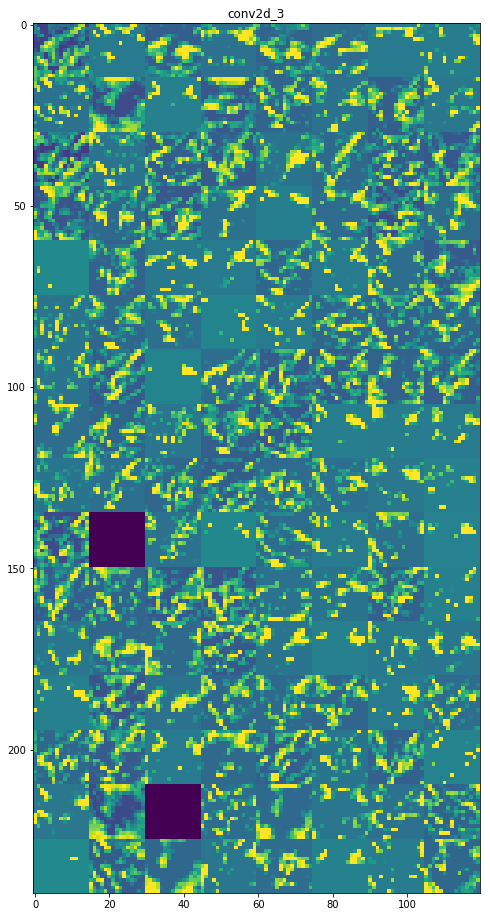

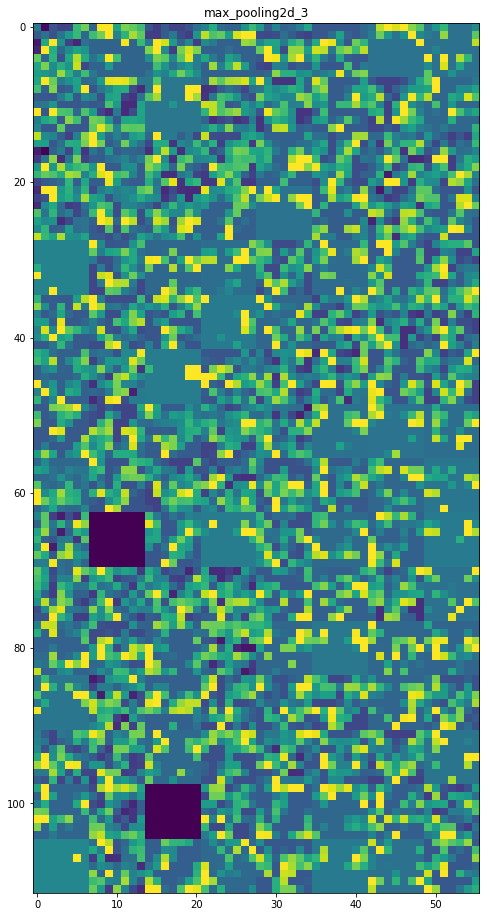

In [36]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations):
    
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.imshow(display_grid, aspect='auto', cmap = 'viridis')
    

In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K

model = VGG16(weights='imagenet',
             include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])